<a href="https://colab.research.google.com/github/FIKENYE/Personal-Projects/blob/main/black_jack_monte_carlo_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulating strategies... this might take a second.


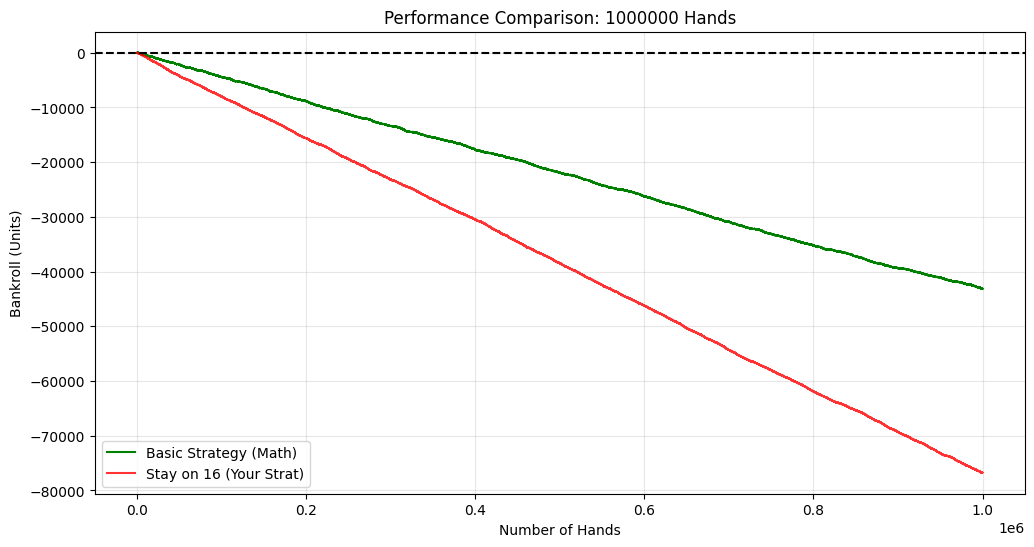

Final Result - Stay on 16: -76760 units
Final Result - Basic Strat: -43140 units


In [ ]:
import random
import matplotlib.pyplot as plt

# --- 1. CORE LOGIC ---

def get_deck():
    """Creates a standard 52-card deck. J, Q, K = 10. A = 11."""
    ranks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]
    deck = ranks * 4
    random.shuffle(deck)
    return deck

def calculate_hand(hand):
    """Calculates hand total, adjusting Aces from 11 to 1 if needed."""
    total = sum(hand)
    num_aces = hand.count(11)

    while total > 21 and num_aces > 0:
        total -= 10
        num_aces -= 1
    return total

def is_soft(hand):
    """Returns True if the hand contains an Ace counted as 11."""
    # It is soft if there is an 11 and we haven't busted yet
    return 11 in hand and sum(hand) <= 21

# --- 2. STRATEGIES ---

def strategy_stay_on_16(player_hand, dealer_up_card):
    """
    SIMPLE STRATEGY:
    - Hit if total < 16
    - Stay if total >= 16
    - Ignores what the dealer has.
    """
    return calculate_hand(player_hand) < 16

def strategy_basic(player_hand, dealer_up_card):
    """
    BASIC STRATEGY (Simplified for Hit/Stay only):
    - Uses Math to decide based on Player Total AND Dealer Up Card.
    """
    total = calculate_hand(player_hand)

    # 1. HARD TOTALS (No Ace, or Ace=1)
    if not is_soft(player_hand):
        if total >= 17:
            return False # Always Stay
        if total <= 11:
            return True  # Always Hit

        # The "Stiff" Hands (12-16)
        if total == 12:
            # Hit unless dealer is weak (4-6)
            return not (4 <= dealer_up_card <= 6)
        if 13 <= total <= 16:
            # Hit unless dealer is weak (2-6)
            return not (2 <= dealer_up_card <= 6)

    # 2. SOFT TOTALS (Ace=11)
    else:
        if total <= 17:
            return True # Always Hit Soft 17 or less
        if total == 18:
            # Hit Soft 18 if dealer is strong (9, 10, A)
            return dealer_up_card in [9, 10, 11]
        if total >= 19:
            return False # Always Stay Soft 19+

    return False # Default fallback

# --- 3. GAME ENGINE ---

def play_single_hand(strategy_func):
    """
    Plays one hand using the provided strategy function.
    Returns: +1 (Win), -1 (Loss), 0 (Draw)
    """
    deck = get_deck()
    player_hand = [deck.pop(), deck.pop()]
    dealer_hand = [deck.pop(), deck.pop()]
    dealer_up = dealer_hand[0]

    # --- PLAYER TURN ---
    while strategy_func(player_hand, dealer_up):
        player_hand.append(deck.pop())
        if calculate_hand(player_hand) > 21:
            return -1 # Player Busts (Auto Loss)

    player_final = calculate_hand(player_hand)

    # --- DEALER TURN ---
    # Dealer must hit on 16 or less. Stays on 17.
    while calculate_hand(dealer_hand) < 17:
        dealer_hand.append(deck.pop())
        if calculate_hand(dealer_hand) > 21:
            return 1 # Dealer Busts (Player Win)

    dealer_final = calculate_hand(dealer_hand)

    # --- RESULT ---
    if player_final > dealer_final:
        return 1
    elif player_final < dealer_final:
        return -1
    else:
        return 0

# --- 4. SIMULATION ---

def run_simulation(strategy_func, n_hands=10000):
    bankroll = 0
    history = [0]

    for _ in range(n_hands):
        result = play_single_hand(strategy_func)
        bankroll += result
        history.append(bankroll)

    return history

# --- 5. EXECUTION & PLOTTING ---

print("Simulating strategies... this might take a second.")
N_HANDS = 1000000

# Run both
history_16 = run_simulation(strategy_stay_on_16, N_HANDS)
history_basic = run_simulation(strategy_basic, N_HANDS)

# Graphing
plt.figure(figsize=(12, 6))

plt.plot(history_basic, color='green', label='Basic Strategy (Math)', linewidth=1.5)
plt.plot(history_16, color='red', label='Stay on 16 (Your Strat)', linewidth=1.5, alpha=0.8)

plt.title(f'Performance Comparison: {N_HANDS} Hands')
plt.xlabel('Number of Hands')
plt.ylabel('Bankroll (Units)')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

# Print Final Stats
print(f"Final Result - Stay on 16: {history_16[-1]} units")
print(f"Final Result - Basic Strat: {history_basic[-1]} units")